# Virtueller Taupunkt Sensor

In [1]:
# The code was removed by Watson Studio for sharing.

,DateTime [UTC],T,Td,ff,dd,P,Pstat,rF,rSD,RR
0,2016-12-31 23:00:00,-5.1,-5.5,1.11,135.0,1032.6,NaN,97.0,0.0,0.0
1,2017-01-01 00:00:00,-5.1,-5.5,0.56,NaN,1031.7,NaN,97.0,0.0,0.0
2,2017-01-01 01:00:00,-5.2,-5.7,1.11,315.0,1031.1,NaN,97.0,0.0,0.0
3,2017-01-01 02:00:00,-5.6,-6.1,1.11,315.0,1030.5,NaN,96.0,0.0,0.0
4,2017-01-01 03:00:00,-5.8,-6.3,1.11,270.0,1029.8,NaN,96.0,0.0,0.0


In [2]:
weather.tail()

,DateTime [UTC],T,Td,ff,dd,P,Pstat,rF,rSD,RR
16283,2018-11-10 10:00:00,10.0,6.9,3.611111,90.0,1013.7,NaN,81.0,0.0,0.0
16284,2018-11-10 11:00:00,10.3,7.0,3.611111,90.0,1013.1,NaN,80.0,0.0,0.0
16285,2018-11-10 12:00:00,10.5,7.3,3.055556,90.0,1012.8,NaN,80.0,0.0,0.0
16286,2018-11-10 13:00:00,10.6,7.2,2.500000,90.0,1012.4,NaN,79.0,0.0,0.0
16287,2018-11-10 14:00:00,10.1,7.1,4.166667,90.0,1012.2,NaN,82.0,0.0,0.0


In [3]:
type(weather)

pandas.core.frame.DataFrame

In [4]:
weather = weather.set_index('DateTime [UTC]')

In [5]:
weather[['T', 'Td']].plot(grid=True, figsize=(30,10));

In [6]:
weather.shape

(16288, 9)

In [7]:
weather.describe()

,T,Td,ff,dd,P,Pstat,rF,rSD,RR
count,16151.000000,16151.000000,16151.000000,15185.000000,16151.000000,0.0,16151.00000,16004.000000,15722.000000
mean,11.334196,6.098161,3.259360,202.208100,1017.296619,NaN,73.42598,24.572929,0.073642
std,9.196078,7.059229,2.261420,93.536968,7.775018,NaN,17.78894,39.645128,0.481459
min,-16.100000,-18.000000,0.000000,0.000000,986.800000,NaN,16.00000,0.000000,0.000000
25%,4.100000,0.800000,1.388889,90.000000,1012.800000,NaN,61.00000,0.000000,0.000000
50%,11.700000,7.000000,2.500000,225.000000,1017.200000,NaN,78.00000,0.000000,0.000000
75%,18.100000,11.800000,4.722222,270.000000,1022.000000,NaN,88.00000,45.000000,0.000000
max,35.600000,21.700000,23.333333,360.000000,1042.000000,NaN,100.00000,100.000000,19.200000


In [8]:
train_data = weather.drop(columns='Pstat').dropna()
train_data.head()

,T,Td,ff,dd,P,rF,rSD,RR
DateTime [UTC],,,,,,,,
2016-12-31 23:00:00,-5.1,-5.5,1.11,135.0,1032.6,97.0,0.0,0.0
2017-01-01 01:00:00,-5.2,-5.7,1.11,315.0,1031.1,97.0,0.0,0.0
2017-01-01 02:00:00,-5.6,-6.1,1.11,315.0,1030.5,96.0,0.0,0.0
2017-01-01 03:00:00,-5.8,-6.3,1.11,270.0,1029.8,96.0,0.0,0.0
2017-01-01 05:00:00,-6.3,-6.8,1.11,270.0,1028.9,96.0,0.0,0.0


In [9]:
train_data.shape

(14789, 8)

## Train a linear regression model using scikits learn

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression() 

In [12]:
X = train_data[['T', 'rF', 'P']]
Y = train_data['Td']

In [13]:
X.head()

,T,rF,P
DateTime [UTC],,,
2016-12-31 23:00:00,-5.1,97.0,1032.6
2017-01-01 01:00:00,-5.2,97.0,1031.1
2017-01-01 02:00:00,-5.6,96.0,1030.5
2017-01-01 03:00:00,-5.8,96.0,1029.8
2017-01-01 05:00:00,-6.3,96.0,1028.9


In [14]:
Y.head()

DateTime [UTC]
2016-12-31 23:00:00   -5.5
2017-01-01 01:00:00   -5.7
2017-01-01 02:00:00   -6.1
2017-01-01 03:00:00   -6.3
2017-01-01 05:00:00   -6.8
Name: Td, dtype: float64

In [15]:
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
lr.coef_, lr.intercept_

(array([0.95267614, 0.2338594 , 0.00237828]), -24.28122367704324)

In [17]:
y_pred = lr.predict(X)
y_pred

array([-3.99970001, -4.09853504, -4.71489187, ...,  6.83934806,
        6.69980496,  6.92456944])

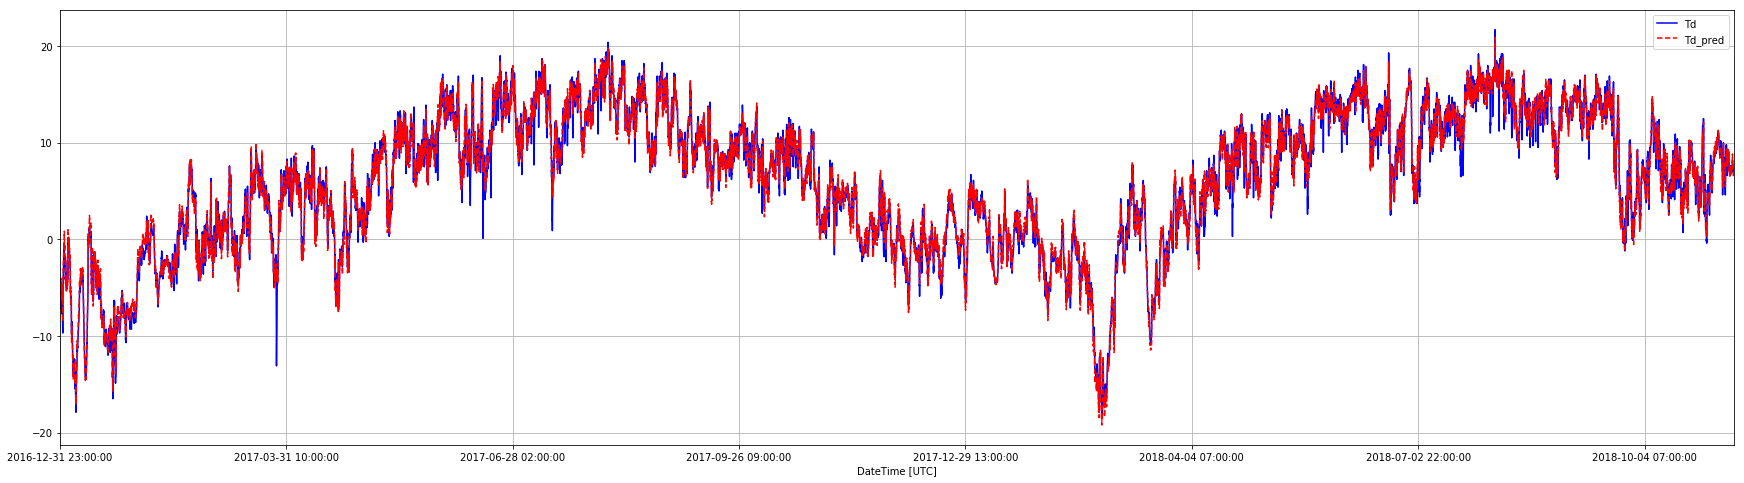

In [18]:
train_data['Td_pred'] = y_pred
train_data[['Td', 'Td_pred']].plot(style=['b-','r--'], figsize=(30,8), grid=True);

Text(0.5, 0, 'Td - TRUE')

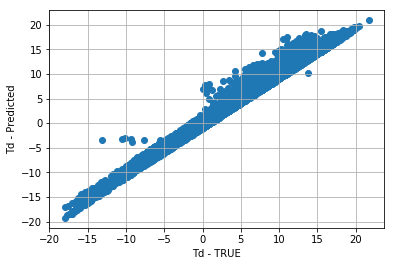

In [19]:
from matplotlib import pylab as plt
plt.scatter(Y.values, y_pred);
plt.grid(True)
plt.ylabel('Td - Predicted')
plt.xlabel('Td - TRUE')

## Try to evaluate future behaviour

### Split into train and test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, shuffle=True)

In [22]:
len(X_train), len(X_test)

(8873, 5916)

In [23]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

Text(0.5, 0, 'Td - TRUE')

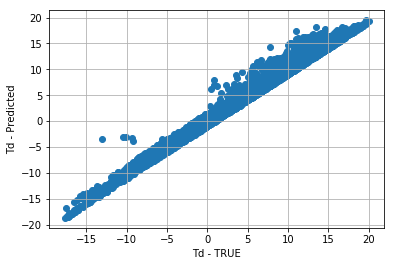

In [25]:
plt.scatter(Y_train.values, y_pred_train);
plt.grid(True)
plt.ylabel('Td - Predicted')
plt.xlabel('Td - TRUE')

Text(0.5, 0, 'Td - TRUE')

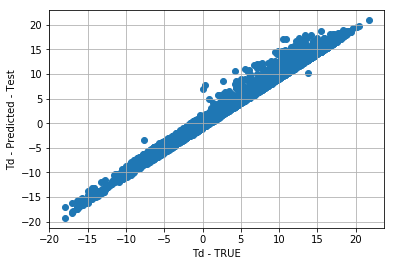

In [26]:
plt.scatter(Y_test.values, y_pred_test);
plt.grid(True)
plt.ylabel('Td - Predicted - Test')
plt.xlabel('Td - TRUE')

In [27]:
from sklearn.metrics.regression import mean_absolute_error, mean_squared_error, r2_score

In [28]:
mean_absolute_error(Y_test, y_pred_test)

0.6165098581847052

In [29]:
mean_squared_error(Y_test, y_pred_test)

0.691462377018533

In [30]:
r2_score(Y_test, y_pred_test)

0.9863907370144849

In [31]:
from sklearn.model_selection import cross_val_predict

In [32]:
y_pred_cv = cross_val_predict(lr, X, Y, cv=3)

In [33]:
r2_score (Y, y_pred_cv)

0.9841372744120441

In [34]:
mean_absolute_error(Y, y_pred_cv)

0.6508762315370569

# Enhance with Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
gb= GradientBoostingRegressor()
gb.fit (X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

(0.2276533012908414, 0.09328310130368603, 0.9981254164056907)

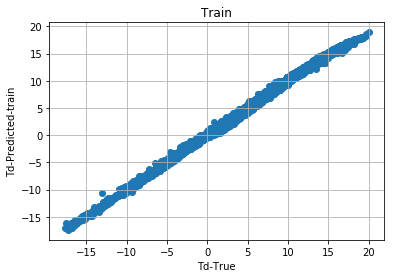

In [38]:
plt.scatter(Y_train.values, y_pred_train);
plt.grid(True)
plt.xlabel('Td-True')
plt.ylabel('Td-Predicted-train')
plt.title('Gradient Boosting - Train')

mean_absolute_error(Y_train, y_pred_train), mean_squared_error(Y_train, y_pred_train), r2_score(Y_train, y_pred_train)

(0.24935425235541742, 0.11740105053937908, 0.9976893294202711)

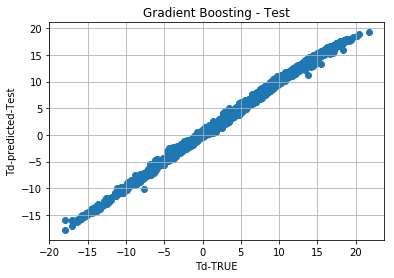

In [39]:
plt.scatter(Y_test.values, y_pred_test);
plt.grid(True)
plt.xlabel('Td-TRUE')
plt.ylabel('Td-predicted-Test')
plt.title('Gradient Boosting - Test')

mean_absolute_error(Y_test, y_pred_test), mean_squared_error(Y_test, y_pred_test), r2_score(Y_test, y_pred_test)

# Try with a Neural Network

In [40]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [52]:
%%timeit -n 1 -r 1
mlp = MLPRegressor()
mlp.fit(X_train, Y_train);

597 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [53]:
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

(0.613467037215512, 0.7169218208833745, 0.985592997391295)

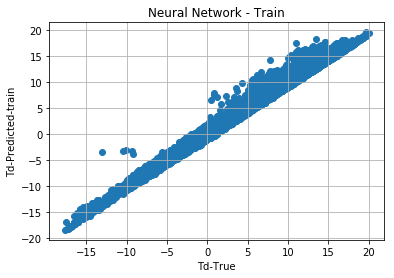

In [58]:
plt.scatter(Y_train.values, y_pred_train);
plt.grid(True)
plt.xlabel('Td-True')
plt.ylabel('Td-Predicted-train')
plt.title('Neural Network - Train')

mean_absolute_error(Y_train, y_pred_train), mean_squared_error(Y_train, y_pred_train), r2_score(Y_train, y_pred_train)

(0.622548180291522, 0.7371777975808416, 0.9854909726865854)

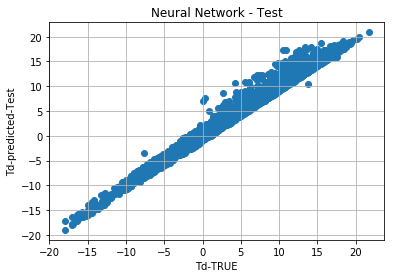

In [59]:
plt.scatter(Y_test.values, y_pred_test);
plt.grid(True)
plt.xlabel('Td-TRUE')
plt.ylabel('Td-predicted-Test')
plt.title('Neural Network - Test')

mean_absolute_error(Y_test, y_pred_test), mean_squared_error(Y_test, y_pred_test), r2_score(Y_test, y_pred_test)

(0.07757182712206494, 0.011629921238310503, 0.999771101564028)

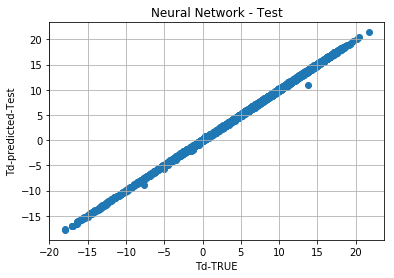

In [63]:
mlp = Pipeline([
    ('scake', StandardScaler()),
    ('mlp', MLPRegressor(
        hidden_layer_sizes = [20, 20],
        alpha= 0.0,
        batch_size = 64
    ))
])

mlp.fit(X_train, Y_train)

y_pred_test = mlp.predict(X_test)

plt.scatter(Y_test.values, y_pred_test);
plt.grid(True)
plt.xlabel('Td-TRUE')
plt.ylabel('Td-predicted-Test')
plt.title('Neural Network - Test')

mean_absolute_error(Y_test, y_pred_test), mean_squared_error(Y_test, y_pred_test), r2_score(Y_test, y_pred_test)

In [62]:
MLPRegressor()

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)